In [8]:
import time
import random
import string
import timeit
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keyword_replacer import KeywordReplacer  # Import algorithm 1
from keyword_replacerV2 import keyword_replacerV2  # Import algorithm 2
from abbreviation_dict import abbreviation_dict  # Import the dictionary
%matplotlib inline

In [47]:
reviews = pd.read_csv("test1.csv")
reviews = reviews['content']

reviews2 = pd.read_csv("test2.csv")
reviews2 = reviews2['content']

reviews3 = pd.read_csv("test3.csv")
reviews3 = reviews3['content']

reviews4 = pd.read_csv("test4.csv")
reviews4 = reviews4['content'].astype(str)

reviews5 = pd.read_csv("test5.csv")
reviews5 = reviews5['content'].astype(str)

reviews6 = pd.read_csv("test6.csv")
reviews6 = reviews6['content'].astype(str)

reviews7 = pd.read_csv("test7.csv")
reviews7 = reviews7['content'].astype(str)

reviews8 = pd.read_csv("test8.csv")
reviews8 = reviews8['content'].astype(str)

reviews9 = pd.read_csv("test9.csv")
reviews9 = reviews9['content'].astype(str)

reviews10 = pd.read_csv("test10.csv")
reviews10 = reviews10['content'].astype(str)

C:\Users\yesme\AppData\Local\Temp/ipykernel_48840/3512680945.py:13: DtypeWarning: Columns (8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  reviews5 = pd.read_csv("test5.csv")


In [48]:
tests = {'test1': reviews, 'test2': reviews2, 'test3': reviews3, 'test4': reviews4, 'test5': reviews5, 'test6': reviews6, 'test7': reviews7, 'test8': reviews8, 'test9': reviews9, 'test10': reviews10}

In [49]:
results_V1 = []
results_V2 = []

In [50]:

def process_reviews(reviews):
    total_review_length = 0
    replacer = KeywordReplacer(abbreviation_dict)
    for review in reviews:
        total_review_length += len(review)
        replacer.replace_keywords(review)
    return total_review_length
        

In [51]:
def process_reviews2(reviews):
    total_review_length = 0
    for review in reviews:
        total_review_length += len(review)
        keyword_replacerV2(review, abbreviation_dict)
    return total_review_length

In [52]:

for key, reviews in tests.items():
    print(f"Processing DataFrame: {key}")

    # Get the total length of all reviews
    total_length = process_reviews(reviews)

    # Time the processing of the current DataFrame
    elapsed_time_ms = timeit.timeit(lambda: process_reviews(reviews), number=1) * 1000

    # Append the total length and time taken to the results list
    results_V1.append({'name': key, 'total_length': total_length, 'time_taken_ms': elapsed_time_ms})

    # Print the results
    print(f"Total length of all reviews: {total_length:,}")
    print(f"Time taken to process all reviews: {elapsed_time_ms:.2f} ms")

# Print the final results list
print("\nFinal Results:")
for result in results_V1:
    print(
        f"{result['name']} - Total length: {result['total_length']}, Time taken: {result['time_taken_ms']:.2f} ms"
    )

Processing DataFrame: test1
Total length of all reviews: 3,825
Time taken to process all reviews: 0.78 ms
Processing DataFrame: test2
Total length of all reviews: 31,307
Time taken to process all reviews: 4.45 ms
Processing DataFrame: test3
Total length of all reviews: 304,375
Time taken to process all reviews: 34.24 ms
Processing DataFrame: test4
Total length of all reviews: 4,920,177
Time taken to process all reviews: 548.94 ms
Processing DataFrame: test5
Total length of all reviews: 5,733,365
Time taken to process all reviews: 599.45 ms
Processing DataFrame: test6
Total length of all reviews: 4,341,718
Time taken to process all reviews: 496.71 ms
Processing DataFrame: test7
Total length of all reviews: 2,602,286
Time taken to process all reviews: 307.82 ms
Processing DataFrame: test8
Total length of all reviews: 977,386
Time taken to process all reviews: 124.42 ms
Processing DataFrame: test9
Total length of all reviews: 1,434,005
Time taken to process all reviews: 159.87 ms
Processi

In [53]:
for key, reviews in tests.items():
    print(f"Processing DataFrame: {key}")

    # Get the total length of all reviews
    total_length = process_reviews2(reviews)

    # Time the processing of the current DataFrame
    elapsed_time_ms = timeit.timeit(lambda: process_reviews2(reviews), number=1) * 1000

    # Append the total length and time taken to the results list
    results_V2.append({'name': key, 'total_length': total_length, 'time_taken_ms': elapsed_time_ms})

    # Print the results
    print(f"Total length of all reviews: {total_length:,}")
    print(f"Time taken to process all reviews: {elapsed_time_ms:.2f} ms")

# Print the final results list
print("\nFinal Results:")
for result in results_V2:
    print(
        f"{result['name']} - Total length: {result['total_length']}, Time taken: {result['time_taken_ms']:.2f} ms"
    )

Processing DataFrame: test1
Total length of all reviews: 3,825
Time taken to process all reviews: 1.00 ms
Processing DataFrame: test2
Total length of all reviews: 31,307
Time taken to process all reviews: 6.95 ms
Processing DataFrame: test3
Total length of all reviews: 304,375
Time taken to process all reviews: 75.24 ms
Processing DataFrame: test4
Total length of all reviews: 4,920,177
Time taken to process all reviews: 1208.43 ms
Processing DataFrame: test5
Total length of all reviews: 5,733,365
Time taken to process all reviews: 1463.44 ms
Processing DataFrame: test6
Total length of all reviews: 4,341,718
Time taken to process all reviews: 1006.53 ms
Processing DataFrame: test7
Total length of all reviews: 2,602,286
Time taken to process all reviews: 612.20 ms
Processing DataFrame: test8
Total length of all reviews: 977,386
Time taken to process all reviews: 238.36 ms
Processing DataFrame: test9
Total length of all reviews: 1,434,005
Time taken to process all reviews: 372.87 ms
Proce

In [97]:
results_V1 = sorted(results_V1, key=lambda x: x['total_length'], reverse=True)

In [98]:
results_V2 = sorted(results_V2, key=lambda x: x['total_length'], reverse=True)

In [99]:
total_lengths = [result['total_length'] for result in results_V1]
runtimes_V1 = [result['time_taken_ms'] for result in results_V1]
runtimes_V2 = [result['time_taken_ms'] for result in results_V2]

In [81]:
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['grid.color'] = 'gray'

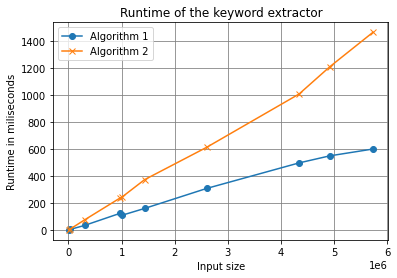

In [101]:
# Create a plot
plt.figure()

# Plot the time measurements of Algorithm 1
plt.plot(total_lengths, runtimes_V1, label="Algorithm 1", marker='o')

# Plot the time measurements of Algorithm 2
plt.plot(total_lengths, runtimes_V2, label="Algorithm 2", marker='x')

# Add labels and a legend
plt.ylabel('Runtime in miliseconds')
plt.xlabel('Input size')
plt.title('Runtime of the keyword extractor')
plt.legend()
plt.grid(True)